# Inference Demo — FakeVoiceFinder

<a id="toc"></a>
## Table of Contents
- [1. Overview](#sec-overview)
- [2. Configure Inputs](#sec-config)
- [3. Test](#sec-run)

In [ ]:
# 1) Rutas y pathing del proyecto (este notebook vive en notebooks/)
import sys, os
from pathlib import Path

lib_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path.insert(0, lib_path)
print("Project root added to sys.path:", lib_path)

<a id="sec-overview"></a>
## 1. Overview

This mini-notebook runs inference on a **single audio file** using a trained model checkpoint.  
You provide:
- `model_path`: path to your trained checkpoint (`.pt` pickled module or TorchScript).
- `audio_path`: path to the audio to evaluate.
- `transform`: one of `mel`, `log`, `dwt`.
- `transform_params`: dict with transform hyperparameters (defaults are aligned with the library).

**Output**: the model's **softmax** scores in percent for `real` and `fake`, plus a friendly plot.


<a id="sec-config"></a>
## 2. Configure Inputs

Edit the variables below. If the import path fails, the cell tries `from inference import InferenceRunner` as a fallback.


In [5]:
from fakevoicefinder.inference import InferenceRunner, FakeProbabilityGauge

In [6]:
# ▶️ Edit these paths/params to your setup

# Example paths (replace with your own)
model_path = "resnet18_pretrain_mel_seed23_epoch001_acc0.94.pt"  # e.g., pickled nn.Module
                         
# Select transform: 'mel' | 'log' | 'dwt'
transform = "mel"

# Transform params (defaults are applied if a key is missing)
transform_params = {
    "sample_rate": 16000,
    "clip_seconds": 4.0,
    "image_size": 224,  # used to resize MEL/LOG/DWT to 224x224; set None to skip resize on MEL/LOG
    # MEL-only params (used when transform='mel'):
    "n_mels": 68,
    "n_fft": 2048,
    "hop_length": 512,
    "win_length": None,
    "fmin": 0,
    "fmax": None,
    # LOG-only params (used when transform='log'):
    # "n_fft": 1024,
    # "hop_length": 256,
    # "win_length": None,
    # DWT-only params (used when transform='dwt'):
    # "wavelet": "db4",
    # "level": 4,
    # "mode": "symmetric",
}

# Device preference: None -> auto, or set "cpu"/"cuda"
device = None


runner = InferenceRunner(
    model_path=model_path,
    transform=transform,
    transform_params=transform_params,
    device=device,
)
print("InferenceRunner ready.")

InferenceRunner ready.


<a id="sec-run"></a>
## 3. Test


### 3.1 Test Fake audio

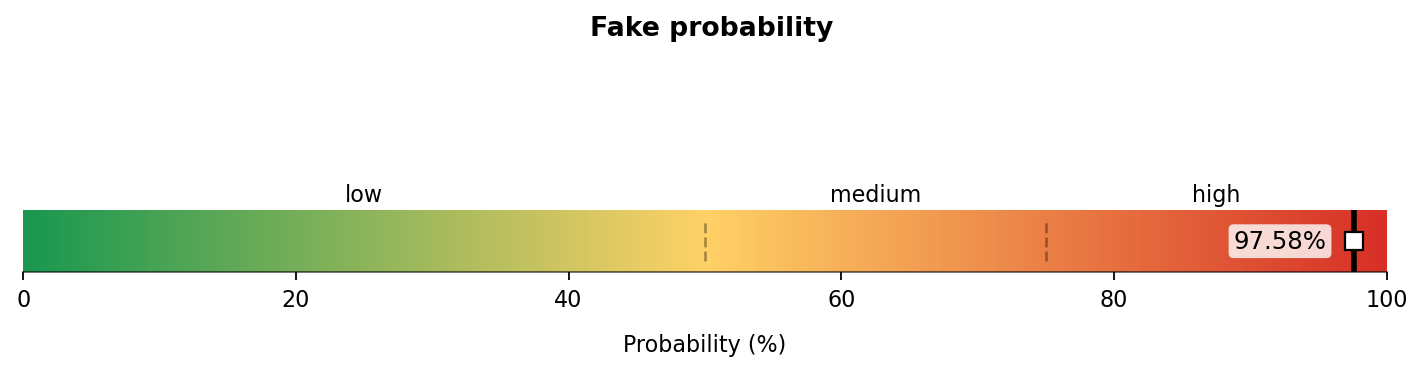

In [30]:
# --------------------------- example usage fake Audio ---------------------------
audio_path = "592.wav"  
scores = runner.predict(audio_path)

gauge = FakeProbabilityGauge(
    title="Fake probability",
    xlabel="Probability (%)",
    bands=((0, 50, "low"), (50, 75, "medium"), (75, 100, "high")),
    show_threshold=False,
)

fig, ax = gauge.plot_from_scores(scores, save_path = "fake_case.png")


### 3.2 Test Real audio

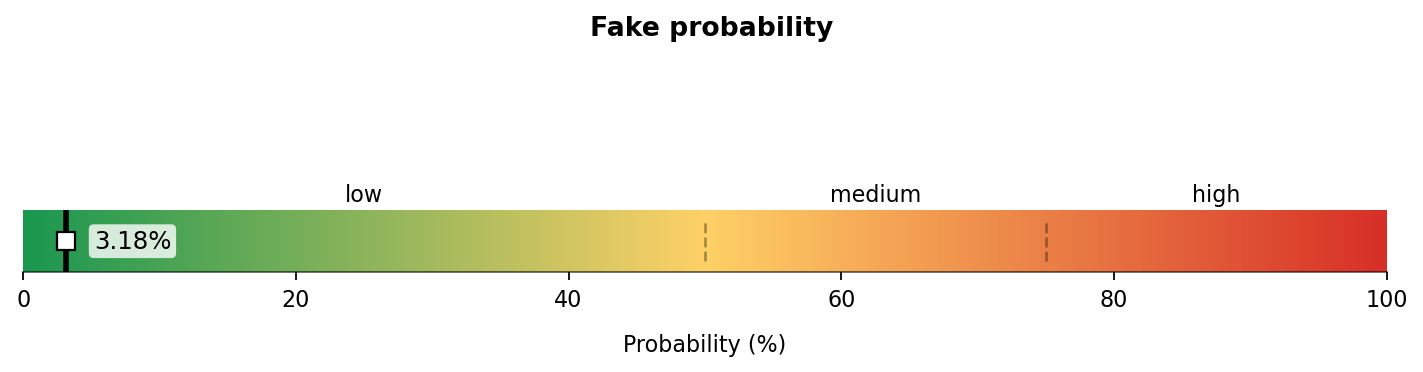

In [28]:
# --------------------------- example usage real audio ---------------------------
audio_path = "174.wav" 
scores = runner.predict(audio_path)

gauge = FakeProbabilityGauge(
    title="Fake probability",
    xlabel="Probability (%)",
    bands=((0, 50, "low"), (50, 75, "medium"), (75, 100, "high")),
    show_threshold=False, 
)

fig, ax = gauge.plot_from_scores(scores, save_path = "real_case.png")